In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [333]:
# Sample size
N = 100

# Number of covariates
D = 25

# Generate features iid to Gaussian
mean = 0
std = 1
X = np.random.normal(loc=mean, scale=std, size=[N, D])


# Generate treatment effect
#beta = 
#T = 1.0 / (1.0 + np.exp(-X))

In [351]:
X_df = pd.DataFrame(X)

In [352]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.266178,0.651935,-0.556095,1.200113,-0.130088,0.475039,-0.348025,-1.196935,0.694828,-1.382146,...,-0.482352,0.809083,0.853330,-0.510098,-1.468462,0.511090,-0.007633,0.862492,-0.405346,-0.933926
1,0.065991,0.187191,-1.273811,0.321281,-2.452392,1.509492,-1.549894,-0.263690,-0.659679,1.609612,...,-0.612111,-0.538115,-0.369105,0.595511,0.368058,-0.913305,2.328762,-0.247013,-0.962328,-0.181889
2,-0.729291,0.490497,0.373508,0.763812,0.075702,2.319498,0.371990,-1.910100,-0.646772,0.928867,...,-1.646363,-0.479393,0.419118,-0.782388,0.135929,1.721297,-1.209967,0.798655,-0.629949,0.019304
3,-0.471181,-0.616077,-0.204949,0.568286,0.205222,-1.020022,0.821655,0.981660,0.301099,0.675526,...,-0.555986,-0.442143,-0.882623,-0.939752,0.580947,-0.313086,-0.354034,0.321964,0.409995,-1.628792
4,-1.774674,2.121032,-0.370696,-1.036460,0.266106,0.558772,0.933546,-1.863529,-0.491002,-0.287252,...,0.752513,-0.033379,-0.597650,-0.020395,-0.445307,1.262137,1.156923,0.102850,0.424088,0.633404


In [390]:
ratios = []
for alpha in [1.0, 100.0]:    
    #beta = alpha * np.linspace(start=1, stop=0.01, num=D)
    
    print('Before:', np.sum(X, axis=1))
    A = X * alpha# np.dot(X, np.transpose(beta))
    print('After:', np.sum(A, axis=1))
    
    t = 1.0 / (1.0 + np.exp(-np.sum(A, axis=1)))
    T = np.random.binomial(n=1, p=t)
    
    #print(np.mean(T))

    ratios.append(np.mean(T))
    
    

Before: [ -8.35999111e-01   9.84658001e-02   4.29553320e-02  -2.95189516e-01
   1.48512593e+00   7.65032917e+00   7.20976036e+00  -1.96207607e+00
  -7.37912750e-02   5.79631910e+00  -1.21654495e+00  -3.54324327e+00
   1.29392220e+00   5.77921596e+00  -2.85502365e+00   6.25345397e+00
  -9.68092251e+00   6.49621901e+00   1.40481562e+00   1.83452515e+00
  -5.41516898e+00  -4.57294733e+00   1.75169385e+00  -7.81605218e+00
   3.60930606e+00  -3.52464322e+00   6.82761112e-01   2.92352905e-03
  -2.20978993e+00  -6.36921762e+00   5.02006886e+00   2.27924739e+00
   2.27498386e+00  -3.46010540e+00   6.36286044e+00  -7.56620123e+00
  -9.24288390e-01   3.08079735e+00  -8.45970922e-01  -8.44250762e-01
   2.84953651e+00   5.04594241e+00  -2.60205129e+00   1.58255534e+00
  -1.99063152e-01  -1.01627691e+01   1.34580086e+00  -5.39481310e+00
   1.07030627e+00   8.79718945e+00  -5.69142998e+00   2.20318246e+00
  -6.87304191e+00   1.54974253e+00   1.10308554e+01   2.05394867e-01
   8.74146383e+00  -3.8617

//anaconda/envs/ox-dl-py3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


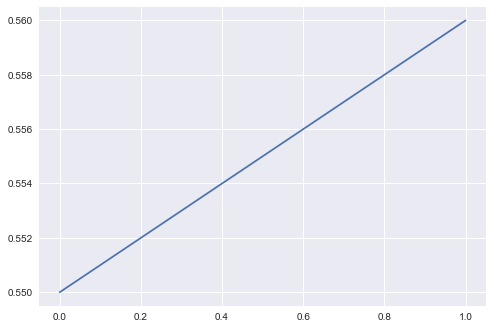

In [391]:
plt.plot(ratios)
plt.show()

In [381]:
X * 10.0

array([[ -2.66177711,   6.51935366,  -5.56095341, ...,   8.62491646,
         -4.05346415,  -9.33925727],
       [  0.65990893,   1.87190526, -12.73810741, ...,  -2.4701268 ,
         -9.62327518,  -1.81889032],
       [ -7.29290528,   4.90496563,   3.73507795, ...,   7.98655323,
         -6.29948542,   0.19303981],
       ..., 
       [ 16.92908526,   4.17938299,  -6.55480663, ...,   4.75818153,
         19.14474127,   1.10108756],
       [-34.12765387,   6.81545548,  21.21758033, ...,   1.78161992,
         -4.17495807,   1.56922773],
       [  2.54971979,  20.04496665,   5.9470852 , ...,  -6.58905881,
        -18.33724521,   0.35234367]])

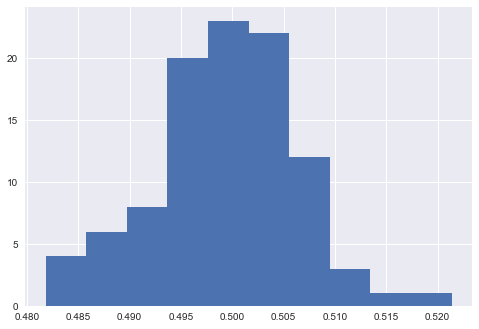

In [149]:
plt.hist(t)
plt.show()

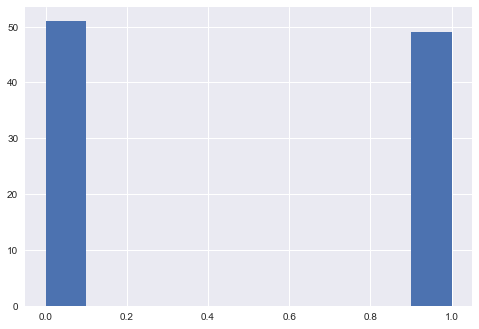

In [152]:
plt.hist(T)
plt.show()

In [204]:
x = [[0.3, 1.2, -0.1], [0.2, -0.7, 1.4]]
alpha = 0.8
beta = [alpha, 0.5 * alpha, 0.1 * alpha]

np.dot(x, np.transpose(beta))

array([ 0.712, -0.008])